In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np

In [ ]:
# Import Datasets and clean
ab = pd.read_csv('Mus_pref_random.csv')
df = ab.drop(ab.index[:2])
df = df.rename(columns={'Treatment-AppleMusic_DO_QID2031':'Treatment_Apple_Music',
                        'Treatment-AppleMusic_DO_QID2021':'Control_Apple_Music',
                        'Treatment/ControlBlock-Spotify_DO_Q2037':'Treatment_Spotify',
                        'Treatment/ControlBlock-Spotify_DO_Q2038':'Control_Spotify'})

df.head()


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q2041_2,Q2041_3,Q2041_4,Q2041_5,Q2041_6,Q2041_6_TEXT,Treatment_Apple_Music,Control_Apple_Music,Treatment_Spotify,Control_Spotify
2,2024-02-18 18:58:07,2024-02-18 19:00:07,Survey Preview,NaN,100,120,True,2024-02-18 19:00:09,R_3Pw7bp0cXF8d6Eq,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
3,2024-02-19 07:02:59,2024-02-19 07:06:19,IP Address,73.236.32.238,100,199,True,2024-02-19 07:06:20,R_5JmoXVKSvfaPI7T,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4,2024-02-19 13:39:44,2024-02-19 13:42:55,IP Address,74.111.97.243,100,190,True,2024-02-19 13:42:55,R_3nl5gbAd0cY0Gl3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
5,2024-02-19 13:49:26,2024-02-19 13:51:57,Survey Preview,NaN,100,151,True,2024-02-19 13:51:58,R_3gMVJhh3CCGGBde,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
6,2024-02-20 08:19:21,2024-02-20 08:21:17,IP Address,71.112.217.136,100,116,True,2024-02-20 08:21:18,R_5QK0NLNWSkDunBY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN


In [ ]:
#Imputed df
df_imp = df.fillna(0)
print(df_imp.columns.to_list())

['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q1', 'Q3', 'Q3_3_TEXT', 'Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6', 'Q4_7', 'Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q7', 'Q8', 'Q8_6_TEXT', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q19_5', 'Q19_6', 'Q19_6_TEXT', 'Q10_1', 'Q10_2', 'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q11', 'Q12', 'Q13', 'Q14', 'Q18', 'Q21', 'Q19_1.1', 'Q19_2.1', 'Q19_3.1', 'Q19_4.1', 'Q19_5.1', 'Q19_6.1', 'Q19_6_TEXT.1', 'Q2039', 'Q2040', 'Q2041_1', 'Q2041_2', 'Q2041_3', 'Q2041_4', 'Q2041_5', 'Q2041_6', 'Q2041_6_TEXT', 'Treatment_Apple_Music', 'Control_Apple_Music', 'Treatment_Spotify', 'Control_Spotify']


In [ ]:
#Change datatypes if required **** Below the Tx and Control cols are in string
df_ttest = df_imp.copy()
columns_to_convert = ['Q19_1','Q19_1.1','Q19_2','Q19_2.1','Q2041_2','Q2041_1','Treatment_Apple_Music', 'Control_Apple_Music', 'Treatment_Spotify', 'Control_Spotify']
# Convert columns to integer type
df_ttest[columns_to_convert] = df_ttest[columns_to_convert].astype(int)


In [ ]:
# We branched out for Apple Music and Spotify but we keep combining this branch to make total treatment and total control group to explore other stratas

# Define the treatment and control conditions
treatment_condition = ((df_ttest['Treatment_Apple_Music'] == 1 ) | (df_ttest['Treatment_Spotify'] == 1))
control_condition = ((df_ttest['Control_Apple_Music'] == 1) | (df_ttest['Control_Spotify'] == 1))

# Initialize a new column with None or np.nan (for rows that might not meet any condition)
df_ttest['Group'] = np.nan

# Apply conditions to assign 'treatment' or 'control' labels -- Now we have a column that tells you whether they're in Tx group or Control group
df_ttest.loc[treatment_condition, 'Group'] = 'Treatment'
df_ttest.loc[control_condition, 'Group'] = 'Control'

df_ttest.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q2041_3,Q2041_4,Q2041_5,Q2041_6,Q2041_6_TEXT,Treatment_Apple_Music,Control_Apple_Music,Treatment_Spotify,Control_Spotify,Group
2,2024-02-18 18:58:07,2024-02-18 19:00:07,Survey Preview,0,100,120,True,2024-02-18 19:00:09,R_3Pw7bp0cXF8d6Eq,0,...,0,0,0,0,0,0,1,0,0,Control
3,2024-02-19 07:02:59,2024-02-19 07:06:19,IP Address,73.236.32.238,100,199,True,2024-02-19 07:06:20,R_5JmoXVKSvfaPI7T,0,...,0,0,0,0,0,0,1,0,0,Control
4,2024-02-19 13:39:44,2024-02-19 13:42:55,IP Address,74.111.97.243,100,190,True,2024-02-19 13:42:55,R_3nl5gbAd0cY0Gl3,0,...,0,0,0,0,0,0,1,0,0,Control
5,2024-02-19 13:49:26,2024-02-19 13:51:57,Survey Preview,0,100,151,True,2024-02-19 13:51:58,R_3gMVJhh3CCGGBde,0,...,0,0,0,0,0,1,0,0,0,Treatment
6,2024-02-20 08:19:21,2024-02-20 08:21:17,IP Address,71.112.217.136,100,116,True,2024-02-20 08:21:18,R_5QK0NLNWSkDunBY,0,...,0,0,0,0,0,1,0,0,0,Treatment


In [ ]:

# Adding columns that indicate whether they opted to try, switch or increase importance

# Conditions for 'Try'
try_conditions = [
    (df_ttest['Q18'] == 'Maybe') | (df_ttest['Q18'] == 'Yes') |
    (df_ttest['Q2039'] == 'Maybe') | (df_ttest['Q2039'] == 'Yes')
]

# Conditions for 'Switch'
switch_conditions = [
    (df_ttest['Q21'] == 'Maybe') | (df_ttest['Q21'] == 'Yes') |
    (df_ttest['Q2040'] == 'Maybe') | (df_ttest['Q2040'] == 'Yes')
]

# Conditions for 'Change Preference' for both treatment and control
pref_change_conditions = [
    # Treatment
    ((df_ttest['Treatment_Apple_Music'] == 1) & (df_ttest['Q19_2.1'] > df_ttest['Q2041_2'])) |
    ((df_ttest['Treatment_Spotify'] == 1) & (df_ttest['Q19_1.1'] > df_ttest['Q2041_1']))|
    # Control
    ((df_ttest['Control_Apple_Music'] == 1) & (df_ttest['Q19_2.1'] > df_ttest['Q2041_2'])) |
    ((df_ttest['Control_Spotify'] == 1) & (df_ttest['Q19_1.1'] > df_ttest['Q2041_1']))
]

# Create the new columns using np.select
df_ttest['Try'] = np.select(try_conditions, [1], default=0)
df_ttest['Switch'] = np.select(switch_conditions, [1], default=0)
df_ttest['Change Preference'] = np.select(pref_change_conditions, [1], default=0)


# This will add the 'Try', 'Switch', and 'Change Preference' columns to df_ttest
# with 'Yes' or 'No' based on the conditions specified.

df_ttest.head()


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q2041_6,Q2041_6_TEXT,Treatment_Apple_Music,Control_Apple_Music,Treatment_Spotify,Control_Spotify,Group,Try,Switch,Change Preference
2,2024-02-18 18:58:07,2024-02-18 19:00:07,Survey Preview,0,100,120,True,2024-02-18 19:00:09,R_3Pw7bp0cXF8d6Eq,0,...,0,0,0,1,0,0,Control,1,0,0
3,2024-02-19 07:02:59,2024-02-19 07:06:19,IP Address,73.236.32.238,100,199,True,2024-02-19 07:06:20,R_5JmoXVKSvfaPI7T,0,...,0,0,0,1,0,0,Control,1,1,1
4,2024-02-19 13:39:44,2024-02-19 13:42:55,IP Address,74.111.97.243,100,190,True,2024-02-19 13:42:55,R_3nl5gbAd0cY0Gl3,0,...,0,0,0,1,0,0,Control,1,0,1
5,2024-02-19 13:49:26,2024-02-19 13:51:57,Survey Preview,0,100,151,True,2024-02-19 13:51:58,R_3gMVJhh3CCGGBde,0,...,0,0,1,0,0,0,Treatment,0,0,1
6,2024-02-20 08:19:21,2024-02-20 08:21:17,IP Address,71.112.217.136,100,116,True,2024-02-20 08:21:18,R_5QK0NLNWSkDunBY,0,...,0,0,1,0,0,0,Treatment,1,1,1


In [ ]:
# Some EDA that might support Niharika's analysis later -- Apoorva
group_analysis = df_ttest[[ 'Treatment_Apple_Music',
       'Control_Apple_Music', 'Treatment_Spotify', 'Control_Spotify', 'Group',
       'Try', 'Switch', 'Change Preference']]
group_analysis.head()

,Treatment_Apple_Music,Control_Apple_Music,Treatment_Spotify,Control_Spotify,Group,Try,Switch,Change Preference
2,0,1,0,0,Control,1,0,0
3,0,1,0,0,Control,1,1,1
4,0,1,0,0,Control,1,0,1
5,1,0,0,0,Treatment,0,0,1
6,1,0,0,0,Treatment,1,1,1


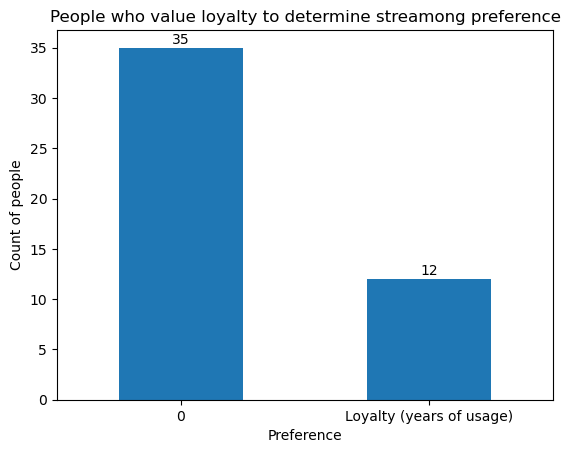

In [ ]:
# Take your strata of interest -- Pick a question which will give you this answer -- Refer Appendix Q Identifier

# I am visualizing loyalty first which is Q_10_6

#Standard Code
plot= df_ttest['Q10_6'].value_counts()

# Plotting
ax = plot.plot(kind='bar')
plt.title('People who value loyalty to determine streamong preference')
plt.xlabel('Preference')
plt.ylabel('Count of people')
plt.xticks(rotation=0)

# Annotate each bar with its count
for i, v in enumerate(plot):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()


In [ ]:
#Updating code to improve this graph for report later

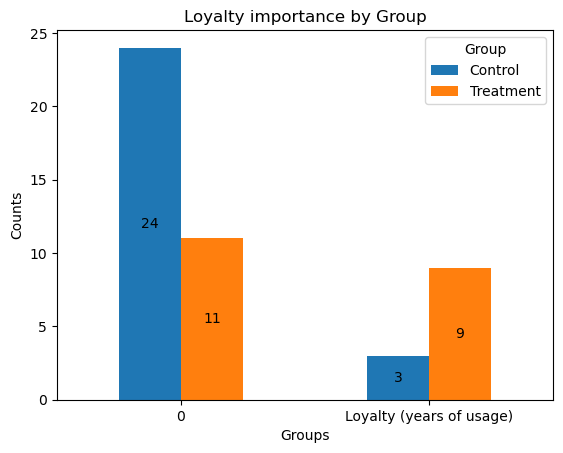

In [ ]:
# Visualzing differences in loyalty per group  -- Treatment
# Analyse how many people are in tx group v/s control group
plot_dust = df_ttest.groupby(['Q10_6', 'Group']).size().unstack()

# Plotting
ax = plot_dust.plot(kind='bar')
plt.title('Loyalty importance by Group')
plt.xlabel('Groups')
plt.ylabel('Counts')
plt.xticks(rotation=0)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(int(i.get_height())), ha='center', va='center')


plt.show()


#### Interpretation
- We can observe that people in trearment group value loyalty way more than people in control group.This could possibly cause an unbalanced comparision


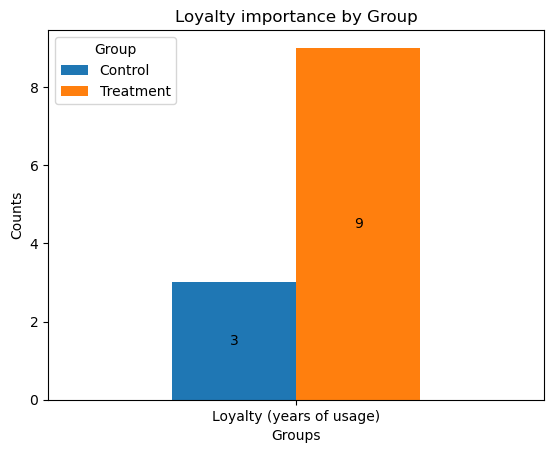

In [ ]:
# EDA on how people performed on the three parameters we used to measure success
loyals = df_ttest[df_ttest['Q10_6']!=0] # filter based on your condition for the strata

# Analyse how many people are in tx group v/s control group
plot_dust = loyals.groupby(['Q10_6', 'Group']).size().unstack()

# Plotting
ax = plot_dust.plot(kind='bar')
plt.title('Loyalty importance by Group')
plt.xlabel('Groups')
plt.ylabel('Counts')
plt.xticks(rotation=0)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(int(i.get_height())), ha='center', va='center')


plt.show()


<Figure size 1000x600 with 0 Axes>

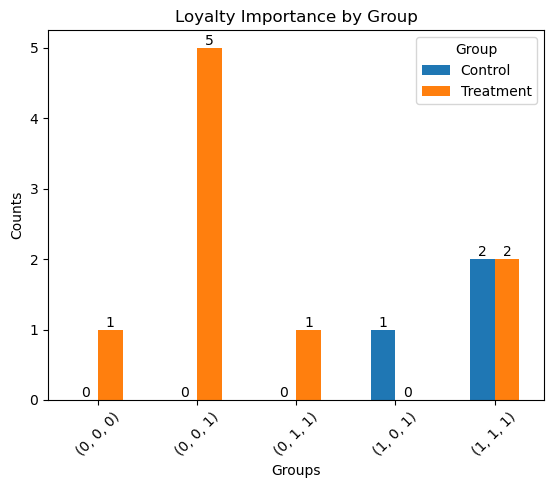

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size for larger image
plt.figure(figsize=(10, 6))  # You can adjust the size as needed

# Assuming df_ttest and other imports are already defined
plot_dust = loyals.groupby(['Try', 'Switch', 'Change Preference', 'Group']).size().unstack()

# Plotting with enhanced settings
ax = plot_dust.plot(kind='bar')
plt.title('Loyalty Importance by Group')
plt.xlabel('Groups')  # Update this if you need more descriptive labels
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Adjust rotation for better label visibility

# Adding text labels on bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height(), str(int(i.get_height())), ha='center', va='bottom')

# Show plot with adjusted settings
plt.show()


#### Interpretation
- There is not much room for subgroup analysis here to measure the differences between these two groups however it will be helpful in pointing out balance considerations

In [ ]:
#In case analysis in any dimension seems feasible - Next Steps

# Measuring Intent to Try in this strata -- Work on this code if requeired, Use Niharika's code and edit accordingly

treatment_condition = ((df_ttest['Group'] == 'Treatment') & (df_ttest['Q10_6']!=0))
control_condition = ((df_ttest['Group'] == 'Control') & (df_ttest['Q10_6']!=0))

positive_intent_treatment = df_ttest[treatment_condition]['Try']
positive_intent_control = df_ttest[control_condition]['Try']

print('\n****** Statistical Analysis for Positive Effect on Intent of Survey Takers Advertised Streaming Service ******')

print('\n******Summary Stats for Treatment Group******')
print(positive_intent_treatment.describe())
print('\n******Summary Stats for Control Group******')
print(positive_intent_control.describe())
print('\n******Difference in Averages******')
diff = positive_intent_treatment[:-1].mean() - positive_intent_control[:-1].mean()
print(diff)
print('\n******T-Stat and P-Value Respectively******')
t_stat, p_value = ttest_ind(positive_intent_treatment, positive_intent_control, equal_var=False)
print(t_stat, p_value)


****** Statistical Analysis for Positive Effect on Intent of Survey Takers Advertised Streaming Service ******

******Summary Stats for Treatment Group******
count    9.000000
mean     0.222222
std      0.440959
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      1.000000
Name: Try, dtype: float64

******Summary Stats for Control Group******
count    3.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: Try, dtype: float64

******Difference in Averages******
-0.75

******T-Stat and P-Value Respectively******
-5.291502622129181 0.0007359017195464888


C:\Users\Hiba\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#Meausring Intent to Switch for thsi strata

In [ ]:
# Measuring Chage in Pref for this Strata

#### Willingness to Spend
- Q13 - What is the maximum amount you're willing to pay for a music streaming service per month?

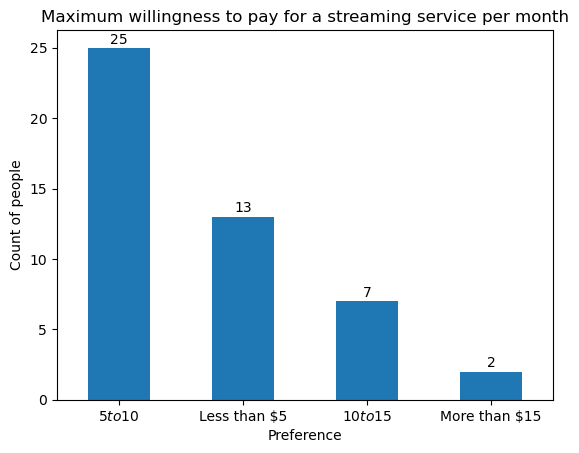

In [ ]:
# Take your strata of interest -- Pick a question which will give you this answer -- Refer Appendix Q Identifier

# Q13 - What is the maximum amount you're willing to pay for a music streaming service per month?

#Standard Code
plot= df_ttest['Q13'].value_counts()

# Plotting
ax = plot.plot(kind='bar')
plt.title('Maximum willingness to pay for a streaming service per month')
plt.xlabel('Preference')
plt.ylabel('Count of people')
plt.xticks(rotation=0)

# Annotate each bar with its count
for i, v in enumerate(plot):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()


In [ ]:
#Updating code to improve this graph for report later

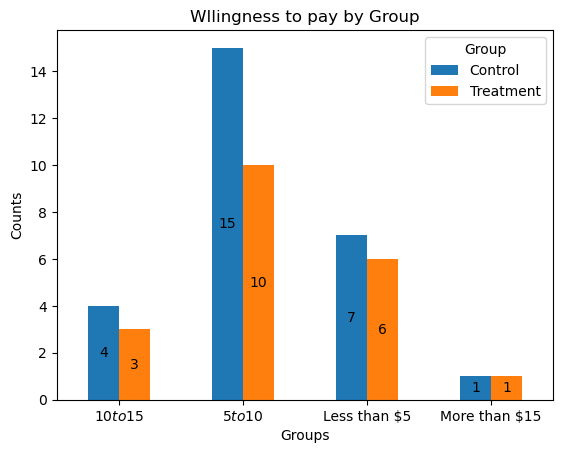

In [ ]:
# Visualzing differences in loyalty per group  -- Treatment
# Analyse how many people are in tx group v/s control group
plot_dust = df_ttest.groupby(['Q13', 'Group']).size().unstack()

# Plotting
ax = plot_dust.plot(kind='bar')
plt.title('Wllingness to pay by Group')
plt.xlabel('Groups')
plt.ylabel('Counts')
plt.xticks(rotation=0)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(int(i.get_height())), ha='center', va='center')


plt.show()


#### Interpretation
- We observe that people are most comfortable spending between USD 5-10 with people in the control group being willing to pay a higher amount.


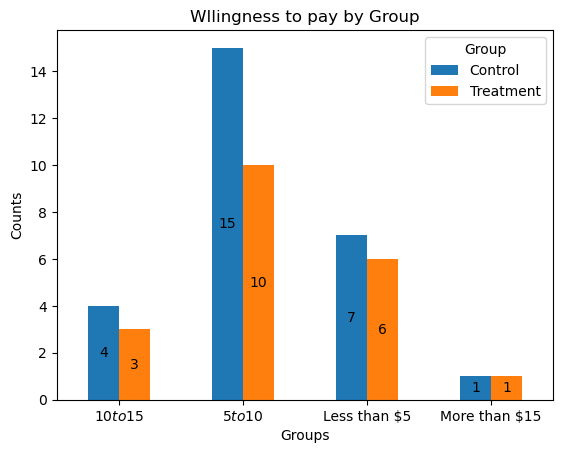

In [ ]:
# EDA on how people performed on the three parameters we used to measure success
willingness_spend = df_ttest[df_ttest['Q13']!=0] # filter based on your condition for the strata

# Analyse how many people are in tx group v/s control group
plot_dust = willingness_spend.groupby(['Q13', 'Group']).size().unstack()

# Plotting
ax = plot_dust.plot(kind='bar')
plt.title('Wllingness to pay by Group')
plt.xlabel('Groups')
plt.ylabel('Counts')
plt.xticks(rotation=0)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(int(i.get_height())), ha='center', va='center')


plt.show()


<Figure size 1000x600 with 0 Axes>

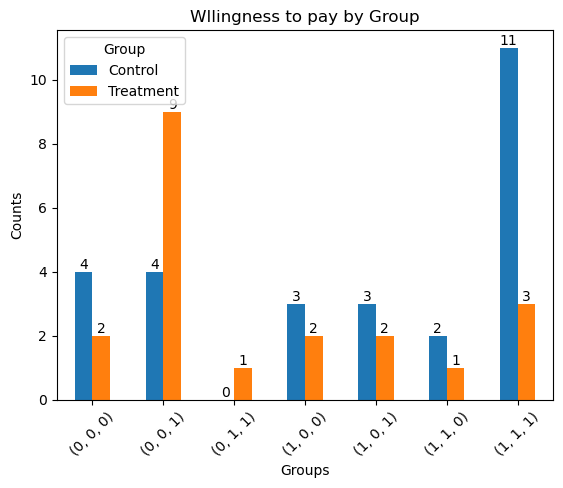

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size for larger image
plt.figure(figsize=(10, 6))  # You can adjust the size as needed

# Assuming df_ttest and other imports are already defined
plot_dust = willingness_spend.groupby(['Try', 'Switch', 'Change Preference', 'Group']).size().unstack()

# Plotting with enhanced settings
ax = plot_dust.plot(kind='bar')
plt.title('Wllingness to pay by Group')
plt.xlabel('Groups')  # Update this if you need more descriptive labels
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Adjust rotation for better label visibility

# Adding text labels on bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height(), str(int(i.get_height())), ha='center', va='bottom')

# Show plot with adjusted settings
plt.show()


#### Interpretation
- As a subgroup analysis, we observe that most people in the analysis were willing to try, switch and change preference. One key observation being that people in the treatment group were more likely to change preference as compared to the control group which may reflect that the treatment could be effective in terms of encouraging people to pay for the service.

In [ ]:
#In case analysis in any dimension seems feasible - Next Steps

# Measuring Intent to Try in this strata -- Work on this code if requeired, Use Niharika's code and edit accordingly

treatment_condition = ((df_ttest['Group'] == 'Treatment') & (df_ttest['Q13']!=0))
control_condition = ((df_ttest['Group'] == 'Control') & (df_ttest['Q13']!=0))

positive_intent_treatment = df_ttest[treatment_condition]['Try']
positive_intent_control = df_ttest[control_condition]['Try']

print('\n****** Statistical Analysis for Positive Effect on Intent of Survey Takers Advertised Streaming Service ******')

print('\n******Summary Stats for Treatment Group******')
print(positive_intent_treatment.describe())
print('\n******Summary Stats for Control Group******')
print(positive_intent_control.describe())
print('\n******Difference in Averages******')
diff = positive_intent_treatment[:-1].mean() - positive_intent_control[:-1].mean()
print(diff)
print('\n******T-Stat and P-Value Respectively******')
t_stat, p_value = ttest_ind(positive_intent_treatment, positive_intent_control, equal_var=False)
print(t_stat, p_value)


****** Statistical Analysis for Positive Effect on Intent of Survey Takers Advertised Streaming Service ******

******Summary Stats for Treatment Group******
count    20.000000
mean      0.400000
std       0.502625
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Try, dtype: float64

******Summary Stats for Control Group******
count    27.000000
mean      0.703704
std       0.465322
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Try, dtype: float64

******Difference in Averages******
-0.27125506072874495

******T-Stat and P-Value Respectively******
-2.113389785437047 0.040979577495250524


#### Willingness to Spend

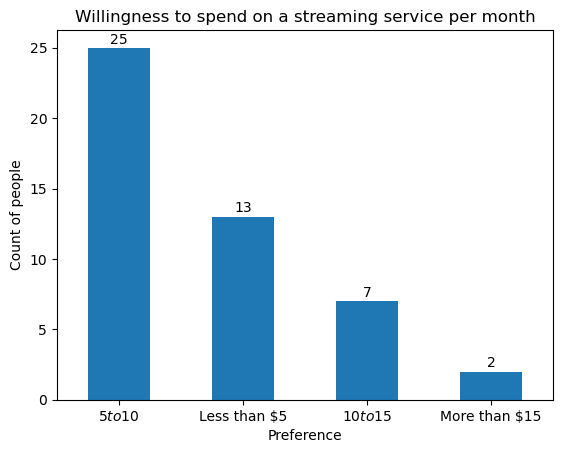

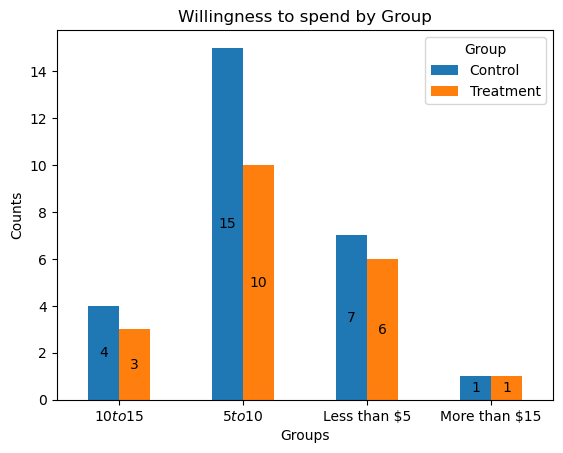

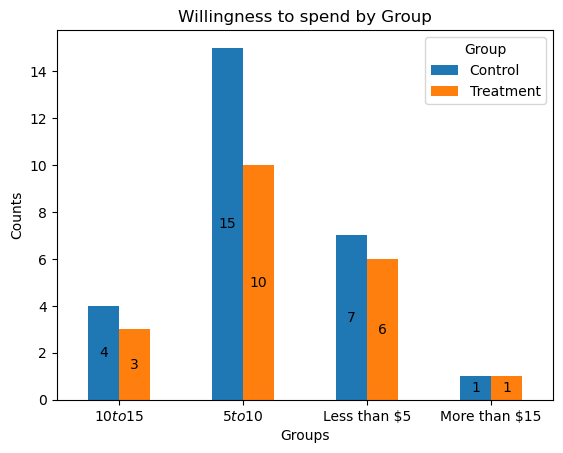

<Figure size 1000x600 with 0 Axes>

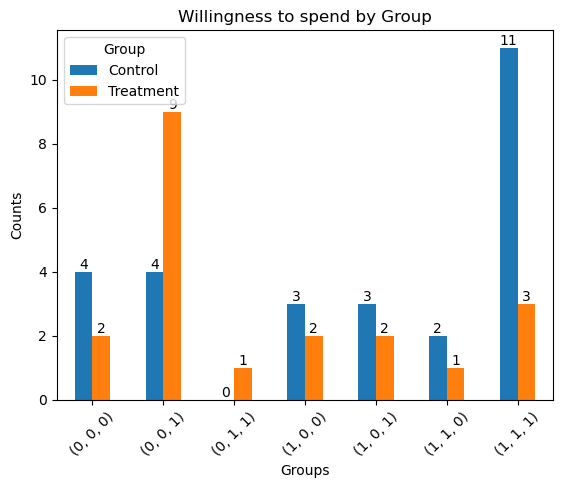


****** Statistical Analysis for Positive Effect on Intent of Survey Takers Advertised Streaming Service ******

******Summary Stats for Treatment Group******
count    20.000000
mean      0.400000
std       0.502625
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Try, dtype: float64

******Summary Stats for Control Group******
count    27.000000
mean      0.703704
std       0.465322
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Try, dtype: float64

******Difference in Averages******
-0.27125506072874495

******T-Stat and P-Value Respectively******
-2.113389785437047 0.040979577495250524


In [ ]:
# Take your strata of interest -- Pick a question which will give you this answer -- Refer Appendix Q Identifier

# Q13 - What is the maximum amount you're willing to pay for a music streaming service per month?

#Standard Code
plot= df_ttest['Q13'].value_counts()

# Plotting
ax = plot.plot(kind='bar')
plt.title('Willingness to spend on a streaming service per month')
plt.xlabel('Preference')
plt.ylabel('Count of people')
plt.xticks(rotation=0)

# Annotate each bar with its count
for i, v in enumerate(plot):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()


#Updating code to improve this graph for report later

# Visualzing differences in loyalty per group  -- Treatment
# Analyse how many people are in tx group v/s control group
plot_dust = df_ttest.groupby(['Q13', 'Group']).size().unstack()

# Plotting
ax = plot_dust.plot(kind='bar')
plt.title('Willingness to spend by Group')
plt.xlabel('Groups')
plt.ylabel('Counts')
plt.xticks(rotation=0)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(int(i.get_height())), ha='center', va='center')


plt.show()


#### Interpretation
#We can observe that people in trearment group value loyalty way more than people in control group.This could possibly cause an unbalanced comparision


# EDA on how people performed on the three parameters we used to measure success
willingness = df_ttest[df_ttest['Q13']!=0] # filter based on your condition for the strata

# Analyse how many people are in tx group v/s control group
plot_dust = willingness.groupby(['Q13', 'Group']).size().unstack()

# Plotting
ax = plot_dust.plot(kind='bar')
plt.title('Willingness to spend by Group')
plt.xlabel('Groups')
plt.ylabel('Counts')
plt.xticks(rotation=0)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(int(i.get_height())), ha='center', va='center')


plt.show()


import matplotlib.pyplot as plt

# Set the figure size for larger image
plt.figure(figsize=(10, 6))  # You can adjust the size as needed

# Assuming df_ttest and other imports are already defined
plot_dust = willingness.groupby(['Try', 'Switch', 'Change Preference', 'Group']).size().unstack()

# Plotting with enhanced settings
ax = plot_dust.plot(kind='bar')
plt.title('Willingness to spend by Group')
plt.xlabel('Groups')  # Update this if you need more descriptive labels
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Adjust rotation for better label visibility

# Adding text labels on bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height(), str(int(i.get_height())), ha='center', va='bottom')

# Show plot with adjusted settings
plt.show()


#### Interpretation
# There is not much room for subgroup analysis here to measure the differences between these two groups however it will be helpful in pointing out balance considerations



#In case analysis in any dimension seems feasible - Next Steps

# Measuring Intent to Try in this strata -- Work on this code if requeired, Use Niharika's code and edit accordingly

treatment_condition = ((df_ttest['Group'] == 'Treatment') & (df_ttest['Q13']!=0))
control_condition = ((df_ttest['Group'] == 'Control') & (df_ttest['Q13']!=0))

positive_intent_treatment = df_ttest[treatment_condition]['Try']
positive_intent_control = df_ttest[control_condition]['Try']

print('\n****** Statistical Analysis for Positive Effect on Intent of Survey Takers Advertised Streaming Service ******')

print('\n******Summary Stats for Treatment Group******')
print(positive_intent_treatment.describe())
print('\n******Summary Stats for Control Group******')
print(positive_intent_control.describe())
print('\n******Difference in Averages******')
diff = positive_intent_treatment[:-1].mean() - positive_intent_control[:-1].mean()
print(diff)
print('\n******T-Stat and P-Value Respectively******')
t_stat, p_value = ttest_ind(positive_intent_treatment, positive_intent_control, equal_var=False)
print(t_stat, p_value)

#### Interpretation
- We observe that people are most comfortable spending between USD 5-10 with people in the control group being willing to pay a higher amount.


#### Interpretation
- As a subgroup analysis, we observe that most people in the analysis were willing to try, switch and change preference. One key observation being that people in the treatment group were more likely to change preference as compared to the control group which may reflect that the treatment could be effective in terms of encouraging people to pay for the service.

#### Interpretation
- The control group exhibits a notably higher mean intent to try (0.703704) compared to the treatment group (0.4), indicating a potential disparity.
- Additionally, the treatment group shows a lower intent to try by approximately 0.27 on average compared to the control group. - Statistical analysis, with a t-statistic of -2.113 and a p-value of 0.041, supports rejecting the null hypothesis, signifying a significant difference in intent to try between the treatment and control groups. Thus, the treatment likely influenced intent to try in a statistically meaningful manner.

#### Hours spent listening to music and podcasts

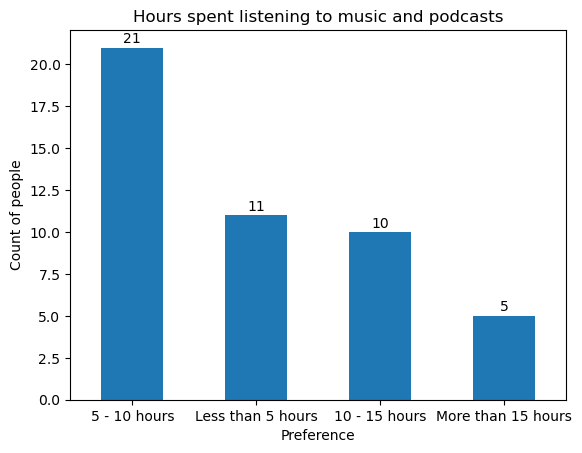

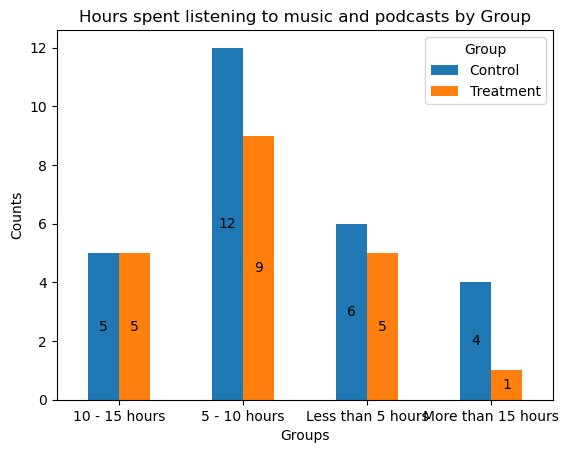

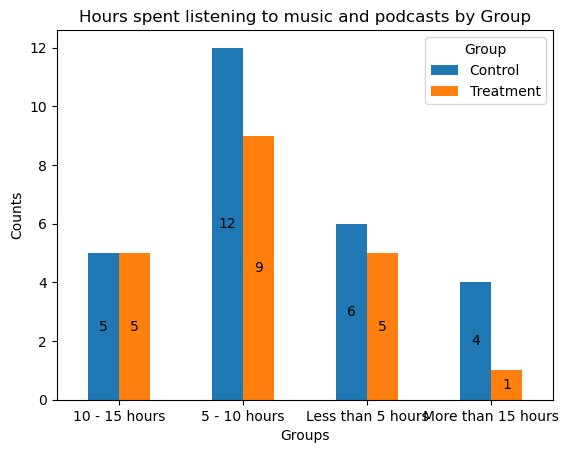

<Figure size 1000x600 with 0 Axes>

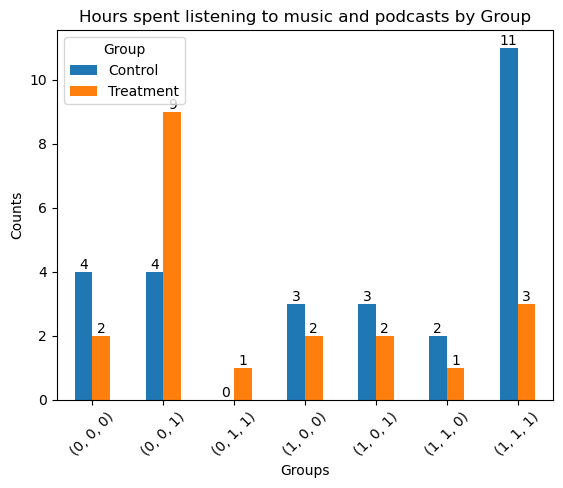


****** Statistical Analysis for Positive Effect on Intent of Survey Takers Advertised Streaming Service ******

******Summary Stats for Treatment Group******
count    20.000000
mean      0.400000
std       0.502625
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Try, dtype: float64

******Summary Stats for Control Group******
count    27.000000
mean      0.703704
std       0.465322
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Try, dtype: float64

******Difference in Averages******
-0.27125506072874495

******T-Stat and P-Value Respectively******
-2.113389785437047 0.040979577495250524


In [ ]:
# Take your strata of interest -- Pick a question which will give you this answer -- Refer Appendix Q Identifier

# Q7 - How many hours per week do you spend listening to music and podcasts?

#Standard Code
plot= df_ttest['Q7'].value_counts()

# Plotting
ax = plot.plot(kind='bar')
plt.title('Hours spent listening to music and podcasts')
plt.xlabel('Preference')
plt.ylabel('Count of people')
plt.xticks(rotation=0)

# Annotate each bar with its count
for i, v in enumerate(plot):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()


#Updating code to improve this graph for report later

# Visualzing differences in loyalty per group  -- Treatment
# Analyse how many people are in tx group v/s control group
plot_dust = df_ttest.groupby(['Q7', 'Group']).size().unstack()

# Plotting
ax = plot_dust.plot(kind='bar')
plt.title('Hours spent listening to music and podcasts by Group')
plt.xlabel('Groups')
plt.ylabel('Counts')
plt.xticks(rotation=0)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(int(i.get_height())), ha='center', va='center')


plt.show()


#### Interpretation
#We can observe that people in trearment group value loyalty way more than people in control group.This could possibly cause an unbalanced comparision


# EDA on how people performed on the three parameters we used to measure success
hours_music = df_ttest[df_ttest['Q7']!=0] # filter based on your condition for the strata

# Analyse how many people are in tx group v/s control group
plot_dust = hours_music.groupby(['Q7', 'Group']).size().unstack()

# Plotting
ax = plot_dust.plot(kind='bar')
plt.title('Hours spent listening to music and podcasts by Group')
plt.xlabel('Groups')
plt.ylabel('Counts')
plt.xticks(rotation=0)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(int(i.get_height())), ha='center', va='center')


plt.show()


import matplotlib.pyplot as plt

# Set the figure size for larger image
plt.figure(figsize=(10, 6))  # You can adjust the size as needed

# Assuming df_ttest and other imports are already defined
plot_dust = hours_music.groupby(['Try', 'Switch', 'Change Preference', 'Group']).size().unstack()

# Plotting with enhanced settings
ax = plot_dust.plot(kind='bar')
plt.title('Hours spent listening to music and podcasts by Group')
plt.xlabel('Groups')  # Update this if you need more descriptive labels
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Adjust rotation for better label visibility

# Adding text labels on bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height(), str(int(i.get_height())), ha='center', va='bottom')

# Show plot with adjusted settings
plt.show()


#### Interpretation
# There is not much room for subgroup analysis here to measure the differences between these two groups however it will be helpful in pointing out balance considerations



#In case analysis in any dimension seems feasible - Next Steps

# Measuring Intent to Try in this strata -- Work on this code if requeired, Use Niharika's code and edit accordingly

treatment_condition = ((df_ttest['Group'] == 'Treatment') & (df_ttest['Q7']!=0))
control_condition = ((df_ttest['Group'] == 'Control') & (df_ttest['Q7']!=0))

positive_intent_treatment = df_ttest[treatment_condition]['Try']
positive_intent_control = df_ttest[control_condition]['Try']

print('\n****** Statistical Analysis for Positive Effect on Intent of Survey Takers Advertised Streaming Service ******')

print('\n******Summary Stats for Treatment Group******')
print(positive_intent_treatment.describe())
print('\n******Summary Stats for Control Group******')
print(positive_intent_control.describe())
print('\n******Difference in Averages******')
diff = positive_intent_treatment[:-1].mean() - positive_intent_control[:-1].mean()
print(diff)
print('\n******T-Stat and P-Value Respectively******')
t_stat, p_value = ttest_ind(positive_intent_treatment, positive_intent_control, equal_var=False)
print(t_stat, p_value)

#### Interpretation
- We can observe that people in the control group spent more time streaming music and podcast services weekly, as compared to the treatment group.


#### Interpretation
- As a subgroup analysis, looks wrong to me

#### Interpretation
- In comparing the treatment and control groups regarding the intent to try the advertised streaming service, it's observed that the treatment group exhibits a lower mean intent to try (0.4) compared to the control group (0.703704).
- The difference in averages indicates that, on average, the intent to try is lower in the treatment group by approximately 0.27.
- Statistical analysis, reflected in the t-statistic of -2.113 and a corresponding p-value of 0.041, provides evidence to reject the null hypothesis, indicating a statistically significant difference in intent to try between the two groups. '
- Thus, the treatment likely had a measurable impact on intent to try the streaming service.

#### Iphone vs Android
- Q3 - Are you an iPhone or Android user? - Selected Choice

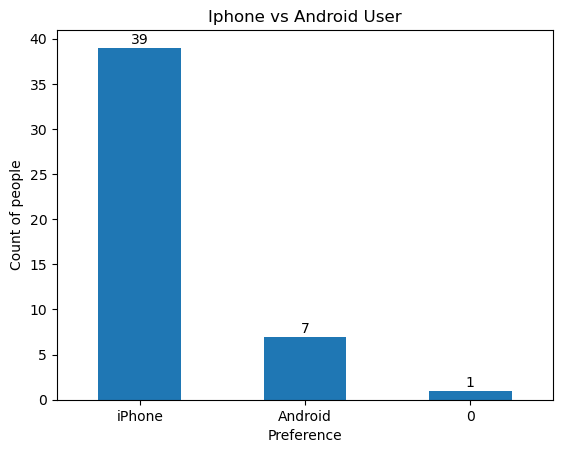

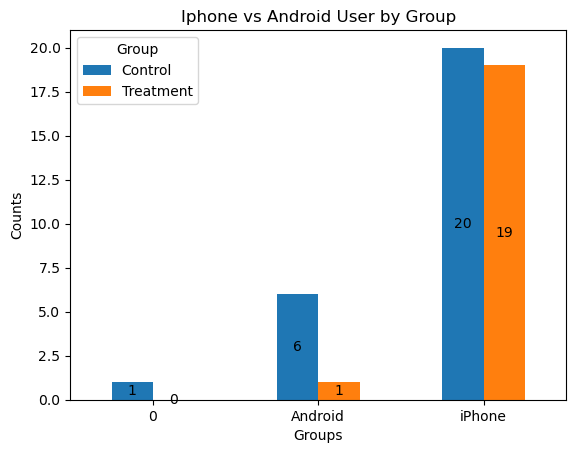

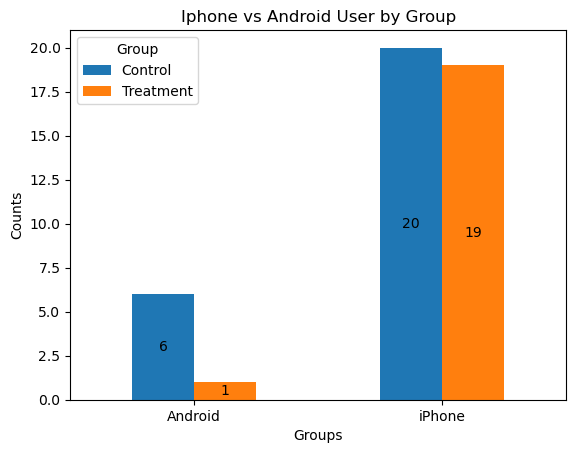

<Figure size 1000x600 with 0 Axes>

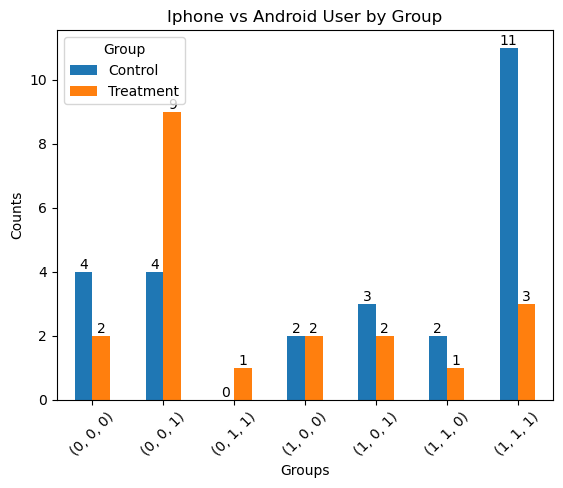


****** Statistical Analysis for Positive Effect on Intent of Survey Takers Advertised Streaming Service ******

******Summary Stats for Treatment Group******
count    20.000000
mean      0.400000
std       0.502625
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Try, dtype: float64

******Summary Stats for Control Group******
count    26.000000
mean      0.692308
std       0.470679
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Try, dtype: float64

******Difference in Averages******
-0.2589473684210527

******T-Stat and P-Value Respectively******


(-2.0098403384600716, 0.05129784704815528)

In [ ]:
# Take your strata of interest -- Pick a question which will give you this answer -- Refer Appendix Q Identifier

# Q3 - Are you an iPhone or Android user? - Selected Choice

#Standard Code
plot= df_ttest[df_ttest['Q3']!=0].value_counts()

# Plotting
ax = plot.plot(kind='bar')
plt.title('Iphone vs Android User')
plt.xlabel('Preference')
plt.ylabel('Count of people')
plt.xticks(rotation=0)

# Annotate each bar with its count
for i, v in enumerate(plot):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()


#Updating code to improve this graph for report later

# Visualzing differences in loyalty per group  -- Treatment
# Analyse how many people are in tx group v/s control group
plot_dust = df_ttest.groupby(['Q3', 'Group']).size().unstack()

# Plotting
ax = plot_dust.plot(kind='bar')
plt.title('Iphone vs Android User by Group')
plt.xlabel('Groups')
plt.ylabel('Counts')
plt.xticks(rotation=0)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(int(i.get_height())), ha='center', va='center')


plt.show()


#### Interpretation
#We can observe that people in trearment group value loyalty way more than people in control group.This could possibly cause an unbalanced comparision


# EDA on how people performed on the three parameters we used to measure success
iphone_android = df_ttest[df_ttest['Q3']!=0] # filter based on your condition for the strata

# Analyse how many people are in tx group v/s control group
plot_dust = iphone_android.groupby(['Q3', 'Group']).size().unstack()

# Plotting
ax = plot_dust.plot(kind='bar')
plt.title('Iphone vs Android User by Group')
plt.xlabel('Groups')
plt.ylabel('Counts')
plt.xticks(rotation=0)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(int(i.get_height())), ha='center', va='center')


plt.show()


import matplotlib.pyplot as plt

# Set the figure size for larger image
plt.figure(figsize=(10, 6))  # You can adjust the size as needed

# Assuming df_ttest and other imports are already defined
plot_dust = iphone_android.groupby(['Try', 'Switch', 'Change Preference', 'Group']).size().unstack()

# Plotting with enhanced settings
ax = plot_dust.plot(kind='bar')
plt.title('Iphone vs Android User by Group')
plt.xlabel('Groups')  # Update this if you need more descriptive labels
plt.ylabel('Counts')
plt.xticks(rotation=45)  # Adjust rotation for better label visibility

# Adding text labels on bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height(), str(int(i.get_height())), ha='center', va='bottom')

# Show plot with adjusted settings
plt.show()


#### Interpretation
# There is not much room for subgroup analysis here to measure the differences between these two groups however it will be helpful in pointing out balance considerations



#In case analysis in any dimension seems feasible - Next Steps

# Measuring Intent to Try in this strata -- Work on this code if requeired, Use Niharika's code and edit accordingly

treatment_condition = ((df_ttest['Group'] == 'Treatment') & (df_ttest['Q3']!=0))
control_condition = ((df_ttest['Group'] == 'Control') & (df_ttest['Q3']!=0))

positive_intent_treatment = df_ttest[treatment_condition]['Try']
positive_intent_control = df_ttest[control_condition]['Try']

print('\n****** Statistical Analysis for Positive Effect on Intent of Survey Takers Advertised Streaming Service ******')

print('\n******Summary Stats for Treatment Group******')
print(positive_intent_treatment.describe())
print('\n******Summary Stats for Control Group******')
print(positive_intent_control.describe())
print('\n******Difference in Averages******')
diff = positive_intent_treatment[:-1].mean() - positive_intent_control[:-1].mean()
print(diff)
print('\n******T-Stat and P-Value Respectively******')
t_stat, p_value = ttest_ind(positive_intent_treatment, positive_intent_control, equal_var=False)
t_stat, p_value

#### Interpretation
- We observe that majority of the people are Iphone users as compared to Android users


#### Interpretation
- As a subgroup analysis, looks wrong to me

#### Interpretation
- It is evident that iPhone users in the treatment group exhibit a lower mean intent to try (0.4) compared to Android users in the control group (0.692308).
- The difference in averages indicates that, on average, intent to try is lower among iPhone users by approximately 0.26.
- However, the statistical analysis reveals a t-statistic of -2.0098 and a corresponding p-value of 0.0513, which is slightly above the typical significance level of 0.05. While the difference approaches significance, it does not reach conventional levels. Thus, there may be a trend suggesting a difference in intent to try between iPhone and Android users, but further investigation may be warranted to confirm this potential disparity.

#### Questions Identifier

- StartDate - Start Dat
- EndDate - End Date
- Status - Response Type
- IPAddress - IP Address
- Progress - Progress
- Duration (in seconds) - Duration (in seconds)
- Finished - Finished
- RecordedDate - Recorded Date
- ResponseId - Response ID
- RecipientLastName - Recipient Last Name
- RecipientFirstName - Recipient First Name
- RecipientEmail - Recipient Email
- ExternalReference - External Data Reference
- LocationLatitude - Location Latitude
- LocationLongitude - Location Longitude
- DistributionChannel - Distribution Channel
- UserLanguage - User Language
- Q1 - What is your age?
- Q3 - Are you an iPhone or Android user? - Selected Choice
- Q3_3_TEXT - Are you an iPhone or Android user? - Other: - Text
- Q4_1 - Do you own any Apple products? (Check all that apply) - iPhone
- Q4_2 - Do you own any Apple products? (Check all that apply) - iPad
- Q4_3 - Do you own any Apple products? (Check all that apply) - Mac (e.g MacBook, iMac)
- Q4_4 - Do you own any Apple products? (Check all that apply) - Apple Watch
- Q4_5 - Do you own any Apple products? (Check all that apply) - AirPods or other Apple audio devices
- Q4_6 - Do you own any Apple products? (Check all that apply) - Apple TV
- Q4_7 - Do you own any Apple products? (Check all that apply) - None
- Q5_1 - If you own an Apple product, have you enjoyed any free subscription as part of the purchase? (Check all that apply) - iPhone
- Q5_2 - If you own an Apple product, have you enjoyed any free subscription as part of the purchase? (Check all that apply) - MacBook Air/Pro
- Q5_3 - If you own an Apple product, have you enjoyed any free subscription as part of the purchase? (Check all that apply) - iPad X/Air/Pro
- Q5_4 - If you own an Apple product, have you enjoyed any free subscription as part of the purchase? (Check all that apply) - Mac/iMac
- Q5_5 - If you own an Apple product, have you enjoyed any free subscription as part of the purchase? (Check all that apply) - None
- Q6_1 - Have you used any of the free subscriptions offered with your Apple product(s)? (Check all that apply) - Yes, regularly
- Q6_2 - Have you used any of the free subscriptions offered with your Apple product(s)? (Check all that apply) - Yes, occasionally
- Q6_3 - Have you used any of the free subscriptions offered with your Apple product(s)? (Check all that apply) - No, I haven't used any free subscriptions
- Q6_4 - Have you used any of the free subscriptions offered with your Apple product(s)? (Check all that apply) - I don't own an Apple product
- Q7 - How many hours per week do you spend listening to music and podcasts?
- Q8 - Which is your preferred apps for listening to music? - Selected Choice
- Q8_6_TEXT - Which is your preferred apps for listening to music? - Other - Text
- Q19_1 - Rank your preferred apps for listening to music. (Please rank them as Primary, Secondary, Tertiary) - Spotify
- Q19_2 - Rank your preferred apps for listening to music. (Please rank them as Primary, Secondary, Tertiary) - Apple Music
- Q19_3 - Rank your preferred apps for listening to music. (Please rank them as Primary, Secondary, Tertiary) - YouTube Music
- Q19_4 - Rank your preferred apps for listening to music. (Please rank them as Primary, Secondary, Tertiary) - Amazon Music
- Q19_5 - Rank your preferred apps for listening to music. (Please rank them as Primary, Secondary, Tertiary) - Pandora
- Q19_6 - Rank your preferred apps for listening to music. (Please rank them as Primary, Secondary, Tertiary) - Other
- Q19_6_TEXT - Rank your preferred apps for listening to music. (Please rank them as Primary, Secondary, Tertiary) - Other - Text
- Q10_1 - What features do you value most in a music streaming platform? (Select all that apply) - Affordability
- Q10_2 - What features do you value most in a music streaming platform? (Select all that apply) - Audio quality
- Q10_3 - What features do you value most in a music streaming platform? (Select all that apply) - Ease of use
- Q10_4 - What features do you value most in a music streaming platform? (Select all that apply) - Music discovery
- Q10_5 - What features do you value most in a music streaming platform? (Select all that apply) - Personalized playlists
- Q10_6 - What features do you value most in a music streaming platform? (Select all that apply) - Loyalty (years of usage)
- Q10_7 - What features do you value most in a music streaming platform? (Select all that apply) - Unique features
- Q10_8 - What features do you value most in a music streaming platform? (Select all that apply) - Social aspect (my friends use it)
- Q11 - Do you engage in social listening, such as having joint playlists with friends?
- Q12 - What is your monthly budget for entertainment, including music streaming services?
- Q13 - What is the maximum amount you're willing to pay for a music streaming service per month?
- Q14 - How much do you think a subscription to Apple Music costs per month?
- Q18 - Based on the information you just found out do you feel inclined to try out to Apple Music?
- Q21 - Based on the information you just found out do you feel inclined to switch to Apple Music?
- Q19_1.1 - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - Spotify
- Q19_2.1 - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - Apple Music
- Q19_3.1 - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - Amazon Music
- Q19_4.1 - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - YouTube Music
- Q19_5.1 - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - Pandora
- Q19_6.1 - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - Other
- Q19_6_TEXT.1 - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - Other - Text
- Q2039 - Based on the information you just found out do you feel inclined to try out to Spotify?
- Q2040 - Based on the information you just found out do you feel inclined to switch to Spotify?
- Q2041_1 - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - Spotify
- Q2041_2 - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - Apple Music
- Q2041_3 - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - Amazon Music
- Q2041_4 - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - YouTube Music
- Q2041_5 - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - Pandora
- Q2041_6 - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - Other
- Q2041_6_TEXT - How would you redefine your rank from above what would your new ranking be. Can you rank order your new preference? - Other - Text
- Treatment-AppleMusic_DO_QID2031 - Treatment - Apple Music - Display Order - QID2031
- Treatment-AppleMusic_DO_QID2021 - Treatment - Apple Music - Display Order - QID2021
- Treatment/ControlBlock-Spotify_DO_Q2037 - Treatment/Control Block - Spotify - Display Order - Q2037
- Treatment/ControlBlock-Spotify_DO_Q2038 - Treatment/Control Block - Spotify - Display Order - Q2038